In [82]:
import requests
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
from textblob import TextBlob
import numpy as np
import time

## Get article links for each company through

In [2]:
r = requests.get('https://www.cnbc.com/2018/10/24/reuters-america-update-3-microsoft-sales-and-profit-beat-estimates-on-cloud-growth.html?&amp;qsearchterm=microsoft%20corp')
html = r.text
soup = BeautifulSoup(html)
article_content = soup.findAll('div', {'class':"group"})


strings = ""
for h in article_content:
    strings += str(h)

title = soup.find("meta",  property="article:published_time")

title['content']


regex = r"(?<=>).*?(?=<)"


article = ''
matches = re.finditer(regex, strings, re.MULTILINE)

for match in matches:
    article += match.group()



In [83]:
def time_content(links):
    time_content = {}
    for link in links:
        r = requests.get(link)
        html = r.text
        soup = BeautifulSoup(html)
        article_content = soup.findAll('div', {'class':"group"})
        strings = ""
        for h in article_content:
            strings += str(h)
        
        regex = r"(?<=>).*?(?=<)"
        article = ''
        matches = re.finditer(regex, strings, re.MULTILINE)
        for match in matches:
            article += match.group()
        
        title = soup.find("meta",  property="article:published_time")
        if title is None:
            time = 0
        else:
            time = title["content"]
                
        time_content.update({time : article})
        
        
    return time_content

In [3]:
# article

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd

driver = webdriver.Firefox()
driver.get("https://www.cnbc.com/search/?query=microsoft%20corp&qsearchterm=microsoft%20corp")
# assert "Python" in driver.title

continue_link = driver.find_element_by_class_name('resultlink')
# print(continue_link.get_attribute('href'))

for i in range(1,400):
    driver.execute_script("window.scrollTo(0,   document.body.scrollHeight);")
    time.sleep(1)
html_source = driver.page_source
data = html_source.encode('utf-8')

driver.quit()

data = data.decode("utf-8") 

links = []

import re

regex = r"(?<=\"resultlink\" style=\"color:black;\" href=\").*?(?=\">)"

matches = re.finditer(regex, data, re.MULTILINE)

for match in matches:
    
    links.append(match.group())

df_links = pd.DataFrame(links, columns=['links'])
df_links.to_pickle('microsoft_links.pkl')

In [85]:
#read file that contains 2000 saved links on microsofts articles from CNBC
ms_links = pd.read_pickle('microsoft_links.pkl')

#turns links to a list
ms_links = ms_links['links'].to_list()

#scrape content of each link
microsoft_content = time_content(ms_links[0:100])

#put into a DataFrame
df_articles = pd.DataFrame(microsoft_content.items(), columns=['Date', 'Content'])

In [4]:
beat_df = df_articles[df_articles['Content'].str.contains("beat")]
#[0] is positive
#[9] is weakly negative
#[10] is weakly positive

increase = df_articles[df_articles['Content'].str.contains("increase")]
#6 is weakly positive
#9 is negative
#15 is positive

In [5]:
beat_df['positivity'] = beat_df['Date']
beat_df = beat_df.drop(columns='Date')

beat_df['text'] = beat_df['Content']
beat_df = beat_df.drop(columns='Content')

beat_df['positivity'][0] = 3
beat_df['positivity'][10] = 4
beat_df = beat_df.drop([ 1,  9, 11, 13, 24, 27, 30, 31, 33, 44, 45, 46, 47, 51, 52,
            53, 54, 55, 56, 57, 58, 59, 60, 61, 69, 70, 86])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
beat_df

,positivity,text
0,3,(Adds revenue outlook)Jan 30 (Reuters) - Micro...
10,4,One thing is for certain: Analysts continue to...


In [7]:
increase['positivity'] = increase['Date']
increase = increase.drop(columns='Date')

increase['text'] = increase['Content']
increase = increase.drop(columns='Content')

increase['positivity'][15] = 3
increase['positivity'][6] = 4
increase['positivity'][9] = 1
increase = increase.drop([ 0, 8, 18, 29, 38, 39, 45, 50, 63, 69, 70, 74, 75, 77, 83, 87])

#5 is neutral, 6-7 is weakly positive, 8-9 is positive, 3-4 weakly negative, 1-2 is negative

#1 is negative, 2 weakly negative, 3 is positive, 4 is weakly positive, 5 is neutral

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
increase

,positivity,text
6,4,Microsoft's longer-term cloud contracts are fo...
9,1,Microsoft's revenue was slightly below consens...
15,3,"Confluent, which commercializes the Apache Kaf..."


In [9]:
# response = requests.get("https://newsapi.org/v2/everything?q=microsoft&sources=reuters&pageSize=100&apiKey=04fa90910183440c97c0e04751bc72c4")
# microsoft_news_json = response.json()
# microsoft_art = microsoft_news_json['articles']


# def get_time_links(json):
#     dicts = {}
#     for x in range(0,100):
#         time = json['articles'][x]['publishedAt']
#         url = json['articles'][x]['url']
#         dicts.update( { time : url} )
#     return dicts

# microsoft_links = get_time_links(microsoft_news_json)
# len(microsoft_links)


# def clean_time(links):  
#     empty = {}
#     for key, value in links.items():
#             datetime = key.split('T')
#             time = datetime[1].strip('Z')
#             datetime[1] = time
#             datetime = ' '.join(datetime)
#             empty.update({datetime : value})
#     return empty

#cleaned_micro_links = clean_time(microsoft_links)

## Scrape Article Content

In [10]:
def get_content(urls_list):
    article_contents = {}
    for key, value in urls_list.items():
        r = requests.get(value)
        html = r.text
        soup = BeautifulSoup(html)
        foundp = soup.findAll('p')
        
        content = str()
        for para in foundp:
            text = para.text
            string_text = str(text)
            content += string_text
        article_contents.update({key : content})
    return article_contents
#         article_contents.append(content)
#     return article_contents
        

In [12]:
# microsoft_content = get_content(cleaned_micro_links)

# list(microsoft_content.keys())[0]

## Get Stock Prices API

In [13]:
r = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=MSFT&apikey=TZZ9RPNH9YGP8SXX&datatype=json')
microsoft_prices = r.json()

In [14]:
microsoft_prices['Time Series (Daily)']['2019-02-05']

{'1. open': '106.0600',
 '2. high': '107.2700',
 '3. low': '105.9600',
 '4. close': '107.2200',
 '5. adjusted close': '107.2200',
 '6. volume': '27269960',
 '7. dividend amount': '0.0000',
 '8. split coefficient': '1.0000'}

In [15]:
URL = "https://www.alphavantage.co/query?"
PARAMS = { 'function' : 'TIME_SERIES_Daily', 'symbol':'MSFT', 'outputsize':'full','datatype':'json', 'apikey':'TZZ9RPNH9YGP8SXX'}

response = requests.get(URL,PARAMS)

x = response.json()

spy_df = pd.DataFrame(x['Time Series (Daily)'])

x['Time Series (Daily)']['2019-02-05']['2. high']

'107.2700'

&nbsp;

## Get Sentiment each article

In [16]:
# blob = TextBlob(list(microsoft_content.values())[0])
# polarity = blob.sentiment.polarity, blob.sentiment.subjectivity
# list(polarity)

# for key, value in microsoft_content.items():
#     blob = TextBlob(value)
#     polarity = blob.sentiment.polarity, blob.sentiment.subjectivity
#     sentiment = list(polarity)
#     print(sentiment)
#     if sentiment[0] > .05:
#         print(value)
#         print(sentiment[0])

# import mediacloud.api
# mc = mediacloud.api.MediaCloud('9bdec5b06584ca67419e76e8d9cc3997e40f9184e14e1af7251fc5ee7b753672')
# res = mc.storyCount('Microsoft AND tags_id_media:58722749', 'publish_date:[NOW-1YEAR TO NOW]')
# print(res['count'])

In [17]:
#read csv datasets
csv = pd.read_csv('datasets/us-economic-newspaper.csv', encoding="ISO-8859-1")
csv2 = pd.read_csv('datasets/dataset2.csv', encoding = "ISO-8859-1")


csv = csv.loc[csv['positivity:confidence'] > .5]
csv2 = csv2.loc[csv2['positivity:confidence'] > .5]


csv['positivity'] = csv['positivity'].replace(2, 1)
csv['positivity'] = csv['positivity'].replace([3, 4], 2)
csv['positivity'] = csv['positivity'].replace([6, 7], 4)
csv['positivity'] = csv['positivity'].replace([8, 9], 3)

csv2['positivity'] = csv2['positivity'].replace(2, 1)
csv2['positivity'] = csv2['positivity'].replace([3, 4], 2)
csv2['positivity'] = csv2['positivity'].replace([6, 7], 4)
csv2['positivity'] = csv2['positivity'].replace([8, 9], 3)


#5 is neutral, 6-7 is weakly positive, 8-9 is positive, 3-4 weakly negative, 1-2 is negative

#1 is negative, 2 weakly negative, 3 is positive, 4 is weakly positive, 5 is neutral

print(csv2['positivity'].unique())

# len(csv.loc[csv['positivity'] == 3])

[2. 4. 5. 1. 3.]


In [18]:
# csv.columns
csv = csv.drop(columns= ['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'positivity:confidence', 'relevance',
       'relevance:confidence', 'orig__golden', 'articleid', 'date', 'headline',
       'lineid', 'next_sentence', 'positivity_gold', 'previous_sentence',
       'relevance_gold'])

# csv2.columns
csv2 = csv2.drop(columns= ['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at','positivity:confidence', 'relevance',
       'relevance:confidence', 'articleid', 'date', 'headline',
       'positivity_gold', 'relevance_gold'])

csv2.head()

,positivity,text
0,2.0,NEW YORK -- Yields on most certificates of dep...
5,2.0,"Stocks declined, as investors weighed slower-t..."
9,2.0,The U.S. dollar declined against most major fo...
17,2.0,"NEW YORK -- The dollar sagged yesterday, as ne..."
20,4.0,"The technology industry, an engine of innovati..."


In [19]:
#take out null values
df = csv[np.isfinite(csv['positivity'])]
df2 = csv2[np.isfinite(csv2['positivity'])]

#reset index
df = df.reset_index()
df2 = df2.reset_index()

#drop index
df = df.drop(columns = 'index')
df2 = df2.drop(columns = 'index')

#add the two datasets
df = df.append(df2)

len(df)

1902

In [20]:
df['positivity'] = df['positivity'].astype(int)

In [21]:
df.tail()

,positivity,text
618,4,After two months in which bad weather held dow...
619,2,"Nicholas F. Brady, the investment banker who d..."
620,2,NEW YORK. Juno 28 cAP) ÛÓFor the second conse...
621,4,"The stock market, jolted 'back, into motion by..."
622,4,Housing starts surged by 4.4 percent last mont...


In [22]:
df = df.append([increase], ignore_index = True)

In [23]:
df['positivity'] = df['positivity'].astype(int)

In [24]:
df.tail()

,positivity,text
1900,4,"The stock market, jolted 'back, into motion by..."
1901,4,Housing starts surged by 4.4 percent last mont...
1902,4,Microsoft's longer-term cloud contracts are fo...
1903,1,Microsoft's revenue was slightly below consens...
1904,3,"Confluent, which commercializes the Apache Kaf..."


&nbsp;

## NLTK: Natural Language Tool Kit

In [25]:
import nltk
import sklearn

from nltk.collocations import *
from nltk import FreqDist, word_tokenize
import string, re
from nltk.stem.snowball import SnowballStemmer

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

# stop words
from nltk.corpus import stopwords
stopwords.words("english")

stop_words = set(stopwords.words('english'))

# stem words
stemmer = SnowballStemmer("english")


#tokenize the text in the article content
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(lambda x: nltk.regexp_tokenize(x, pattern))
df['text'] = df['text'].apply(lambda x: [w for w in x if not w in stop_words])
df['text'] = df['text'].apply(lambda x: [stemmer.stem(word) for word in x])
df['text'] = df['text'].apply(lambda x: ' '.join(x))

print(df.columns)
y = df['positivity']
X = df['text']

Index(['positivity', 'text'], dtype='object')


## Test-Train Split

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


#test train split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tfidf = TfidfVectorizer()

#vectorize the train and test
x_train_tfidf = tfidf.fit_transform(X_train)

# X_train = pd.DataFrame(train_df.toarray(), columns=tfidf.get_feature_names())

X_test_tfidf = tfidf.transform(X_test)

In [79]:
X_train = pd.DataFrame(x_train_tfidf.toarray(), columns=tfidf.get_feature_names())
X_test = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names())

## PCA

In [28]:
# from sklearn.decomposition import PCA

# pca_X_train = pd.DataFrame(X_train, columns=tfidf.get_feature_names())
# pca_X_test = pd.DataFrame(X_test, columns=tfidf.get_feature_names())

# pca = PCA(.95)

In [29]:
# X_train = pca.fit_transform(pca_X_train)

# X_test = pca.transform(pca_X_test)

In [30]:
# pca.n_components_

## Train Models

In [31]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

lsvc_classifier = LinearSVC(C=10.0, dual=False, loss="squared_hinge", penalty="l2", tol=0.1)

lsvc_classifier.fit(X_train, y_train)
lsvc_train_preds = lsvc_classifier.predict(X_train)
lsvc_test_preds = lsvc_classifier.predict(X_test)

lsvc_train_score = accuracy_score(y_train, lsvc_train_preds)
lsvc_test_score = accuracy_score(y_test, lsvc_test_preds)

print('LinearSVC')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(lsvc_train_score, lsvc_test_score))
print("F1 Score: {}".format(f1_score(y_test, lsvc_test_preds, average='micro')))

LinearSVC
Training Accuracy: 1.0 		 Testing Accuracy: 0.5696
F1 Score: 0.5695538057742782


In [32]:
lsvc2_classifier = LinearSVC(C=0.5, dual=True, loss="squared_hinge", penalty="l2", tol=0.001)
lsvc2_classifier.fit(X_train, y_train)
lsvc2_train_preds = lsvc2_classifier.predict(X_train)
lsvc2_test_preds = lsvc2_classifier.predict(X_test)

lsvc2_train_score = accuracy_score(y_train, lsvc2_train_preds)
lsvc2_test_score = accuracy_score(y_test, lsvc2_test_preds)

print('LinearSVC')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(lsvc2_train_score, lsvc2_test_score))
print("F1 Score: {}".format(f1_score(y_test, lsvc_test_preds, average='micro')))

LinearSVC
Training Accuracy: 0.9573 		 Testing Accuracy: 0.6142
F1 Score: 0.5695538057742782


In [33]:
x = 'Amazon beat on earnings and revenues—here’s what three experts are saying about the stock now Amazon beat on earnings and revenues—here’s what five experts are saying about the stock now   11:30 AM ET Fri, 1 Feb 2019 | 04:22 Amazon cloud-computing division said revenue jumped 45 percent in the fourth quarter, as the company continued to cement its lead over Microsoft and Google.  Sales at Amazon Web Services climbed to $7.43 billion from $5.11 billion a year ago, topping the $7.29 billion consensus estimate among analysts polled by FactSet. AWS revenue represented 10 percent of total quarterly sales at Amazon.  The cloud business has become crucial to the success of its parent, not only for revenue but also for profits.  Operating income for AWS in the quarter was $2.18 billion, exceeding the $2.09 billion FactSet consensus estimate. The unit accounted for 58 percent of Amazons overall operating income. AWS operating margin was 29 percent, shrinking from 31 percent the prior quarter.  LIVE, NEWS-MAKING DISCUSSIONS UNIQUE, IN-PERSON EXPERIENCES LEARN MORE + JOIN US   Gene Munsters key takeaways from Amazons quarter Gene Munsters key takeaways from Amazons quarter   5:44 PM ET Thu, 31 Jan 2019 | 05:24 "We are getting more and more creative around getting efficiency up and getting our cost of acquisition down," Amazons chief financial officer, Brian Olsavsky, told analysts on the companys quarterly earnings call on Thursday.  AWS beat Microsoft and Google to the market for cloud infrastructure, which companies use to outsource their computing and data storage needs, and has held onto its lead.  However, Microsofts business is growing faster, even though its still smaller than AWS. The software company said on Wednesday that Azure cloud revenue grew 76 percent in the latest quarter.  Brian Weiser, an analyst at Pivotal Research Group, had estimated that AWS would generate fourth-quarter revenue of $7.41 billion.  "With substantial upside potential for AWS and a strong track record, we think we can safely assume significant ongoing revenue growth for the foreseeable future," wrote Weiser, who initiated Amazon coverage with a "buy" rating earlier this month.  AWS big announcements in the period included the introduction of new computing instances that rely on ARM-based server chips, custom-built chips for accelerating artificial-intelligence work and a plan to offer hardware equipped with AWS software for corporate data centers.'
        
        
        

In [34]:
def text_cleaner(description):
    '''uses regex to tokenize words and capture them from the description, 
    lowers the capitilization remove stop words, reduce to stem words, 
    and joins them all in a string'''
    tokens_raw = nltk.regexp_tokenize(description, pattern)
    tokens = [i.lower() for i in tokens_raw]
    tokens_stopped = [w for w in tokens if not w in stop_words]
    stemmed = [stemmer.stem(word) for word in tokens_stopped]
    cleaned = ' '.join(stemmed)
    return cleaned



def dict_cleaner(dictionary):
    '''iterates through the dictionary values in each key (category) 
    and cleans each description and adds it back to a new list'''
    description_list = []
    for c, d in dictionary.items():
        for description in d:
            cleaned = text_cleaner(description)
            description_list.append(cleaned)
    return description_list


def vc_predict_app(x):    
    x_trial = text_cleaner(x)
    
    x_vect = tfidf.transform([x_trial])

    df_predict = pd.DataFrame(x_vect.toarray(), columns=tfidf.get_feature_names())

    return lsvc2_classifier.predict(df_predict)[0]

vc_predict_app(x)

4

In [35]:
# numbers = {}
# for key, value in microsoft_content.items():
#     number = vc_predict_app(value)
#     numbers.update({key : number})
    

In [36]:
# numbers

## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)

knn_train_score = accuracy_score(y_train, knn_train_preds)
knn_test_score = accuracy_score(y_test, knn_test_preds)

print("KNN")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(knn_train_score, knn_test_score))
print("F1 Score: {}".format(f1_score(y_test, knn_test_preds, average='micro')))

KNN
Training Accuracy: 0.643 		 Testing Accuracy: 0.5538
F1 Score: 0.5538057742782152


In [38]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)

print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("F1 Score: {}".format(f1_score(y_test, nb_test_preds, average='micro')))

Multinomial Naive Bayes
Training Accuracy: 0.6004 		 Testing Accuracy: 0.5591
F1 Score: 0.5590551181102362


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=50)

rf_classifier.fit(X_train, y_train)
rf_train_preds = rf_classifier.predict(X_train)
rf_test_preds = rf_classifier.predict(X_test)

rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("F1 Score: {}".format(f1_score(y_test, rf_test_preds, average='micro')))

Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.643
F1 Score: 0.6430446194225722


In [42]:
# RandomForestClassifier.predict(

In [76]:
from sklearn import svm

svm_clf = svm.SVC(probability=True)

svm_clf.fit(X_train, y_train)
svm_train_preds = svm_clf.predict(X_train)
svm_test_preds = svm_clf.predict(X_test)

svm_train_score = accuracy_score(y_train, svm_train_preds)
svm_test_score = accuracy_score(y_test, svm_test_preds)

print('SVM')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(svm_train_score, svm_test_score))
print("F1 Score: {}".format(f1_score(y_test, svm_test_preds, average='micro')))

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM
Training Accuracy: 0.5072 		 Testing Accuracy: 0.5512
F1 Score: 0.5511811023622047


In [44]:
from sklearn.ensemble import GradientBoostingClassifier


gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features=0.2, min_samples_leaf=3, min_samples_split=15, n_estimators=100, subsample=0.25)

gb_clf.fit(X_train, y_train)
gb_train_preds = gb_clf.predict(X_train)
gb_test_preds = gb_clf.predict(X_test)

gb_train_score = accuracy_score(y_train, gb_train_preds)
gb_test_score = accuracy_score(y_test, gb_test_preds)

print('Gradient Boosting')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(gb_train_score, gb_test_score))
print("F1 Score: {}".format(f1_score(y_test, gb_test_preds, average='micro')))

Gradient Boosting
Training Accuracy: 0.6496 		 Testing Accuracy: 0.6115
F1 Score: 0.6115485564304461


In [45]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier()

adaboost_clf.fit(X_train, y_train)
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

adaboost_train_score = accuracy_score(y_train, adaboost_train_preds)
adaboost_test_score = accuracy_score(y_test, adaboost_test_preds)

print('AdaBoosting')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(adaboost_train_score, adaboost_test_score))
print("F1 Score: {}".format(f1_score(y_test, adaboost_test_preds, average='micro')))

AdaBoosting
Training Accuracy: 0.5492 		 Testing Accuracy: 0.5039
F1 Score: 0.5039370078740157


In [46]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier


xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_train_preds = xgb_clf.predict(X_train)
xgb_test_preds = xgb_clf.predict(X_test)

xgb_train_score = accuracy_score(y_train, xgb_train_preds)
xgb_test_score = accuracy_score(y_test, xgb_test_preds)

print('AdaBoosting')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(xgb_train_score, xgb_test_score))
print("F1 Score: {}".format(f1_score(y_test, xgb_test_preds, average='micro')))

AdaBoosting
Training Accuracy: 0.7631 		 Testing Accuracy: 0.6194
F1 Score: 0.6194225721784777


## Voting Classifier

In [ ]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import GradientBoostingClassifier

# svc1 = LinearSVC(C=25.0, dual=False, loss="squared_hinge", penalty="l2", tol=0.001)
# svc2 = LinearSVC(C=1.0, dual=True, loss="hinge", penalty="l2", tol=1e-05)
# gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features=0.2, min_samples_leaf=3, min_samples_split=15, n_estimators=100, subsample=0.25)


# vc_clf = VotingClassifier(estimators=[('lsvc2_classifier', lsvc2_classifier),
#                                       ('lsvc_classifier', lsvc_classifier),
#                                       ('knn', knn),
# #                                     ('svc1', svc1), 
# #                                      ('svc2', svc2),
#                                      ('gb_clf', gb_clf),
#                                       ('xgb_clf', xgb_clf)
# #                                     ('nb', nb_classifier),
# #                                     ('rf', rf_classifier)
#                                      ], voting='hard')

# vc_clf.fit(X_train, y_train)

In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

svc1 = LinearSVC(C=25.0, dual=False, loss="squared_hinge", penalty="l2", tol=0.001)
svc2 = LinearSVC(C=1.0, dual=True, loss="hinge", penalty="l2", tol=1e-05)
gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features=0.2, min_samples_leaf=3, min_samples_split=15, n_estimators=100, subsample=0.25)


vc_clf = VotingClassifier(estimators=[('lsvc2_classifier', lsvc2_classifier),
                                       ('lsvc_classifier', lsvc_classifier),
                                       ('knn', knn),
#                                     ('svc1', svc1), 
#                                      ('svc2', svc2),
                                      ('svm_clf', svm_clf),
                                     ('gb_clf', gb_clf),
                                      ('xgb_clf', xgb_clf),
                                     ('nb', nb_classifier),
                                     ('rf', rf_classifier)
                                     ], voting='hard')

vc_clf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lsvc2_classifier', LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)), ('lsvc_classifier', LinearSVC(C=10.0, class_weight=...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [55]:
vc_train_preds = vc_clf.predict(X_train)
vc_test_preds = vc_clf.predict(X_test)

vc_train_score = accuracy_score(y_train, vc_train_preds)
vc_test_score = accuracy_score(y_test, vc_test_preds)

print('Voting Classifier')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(vc_train_score, vc_test_score))
print("F1 Score: {}".format(f1_score(y_test, vc_test_preds, average='micro')))

Voting Classifier
Training Accuracy: 0.7585 		 Testing Accuracy: 0.5984
F1 Score: 0.5984251968503937


In [ ]:
from tpot import TPOTClassifier
# from tpot.config import tpot_config


classifier_config_dict = {

    

   

    'sklearn.svm.LinearSVC': {
        'penalty': ["l1", "l2"],
        'loss': ["hinge", "squared_hinge"],
        'dual': [True, False],
        'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
        'C': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.]
    }

}


tpot = TPOTClassifier(generations=20,
#                       config_dict=classifier_config_dict,
                      cv = 3 ,
#                       population_size=30,
                      max_eval_time_mins=7, 
                      verbosity=3,
                     periodic_checkpoint_folder='foldername1'
                     )


#we ran the classifier, which will tell us the best model to use.
tpot.fit(X_train, y_train)
# tpot.export('filename.py')

30 operators have been imported by TPOT.


In [77]:
tpot.export('file.py')

NameError: name 'tpot' is not defined

## Confusion Matrix

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = confusion_matrix(y_test, svm_test_preds)
cate = df.keys()


Confusion matrix, without normalization
[[  0  14   0   4   0]
 [  0 187   0  23   0]
 [  0   3   0   1   0]
 [  0  65   0  58   0]
 [  0  22   0   4   0]]


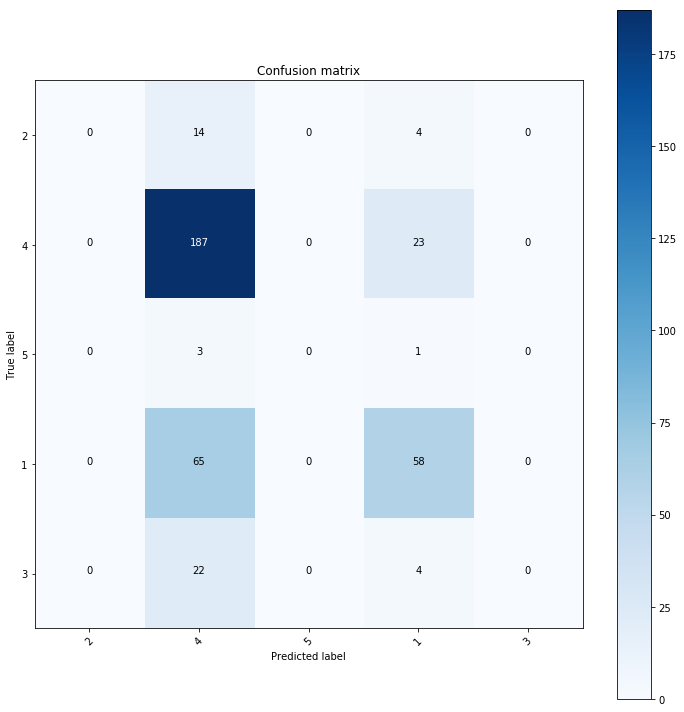

In [61]:
cm = confusion_matrix(y_test, svm_test_preds)
cate = df['positivity'].unique()
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, cate)

#5 is neutral, 6-7 is weakly positive, 8-9 is positive, 3-4 weakly negative, 1-2 is negative

#1 is negative, 2 weakly negative, 3 is positive, 4 is weakly positive, 5 is neutral

In [64]:
import pickle

In [65]:
pickling_on = open("svm_clf.pickle","wb")
pickle.dump(svm_clf, pickling_on)
pickling_on.close()

In [66]:
svm = pd.read_pickle('svm_clf.pickle')

In [68]:
svm


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [80]:
def vc_predict_app(x):    
    x_trial = text_cleaner(x)
    
    x_vect = tfidf.transform([x_trial])

    df_predict = pd.DataFrame(x_vect.toarray(), columns=tfidf.get_feature_names())

    return svm.predict(df_predict)[0]

In [81]:
vc_predict_app(x)

AttributeError: module 'sklearn.svm' has no attribute 'predict'